<a href="https://colab.research.google.com/github/MinjuKim0217/Computer_Vision/blob/main/image_matching_system_hog_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
!pip install scikit-image
!pip install scikit-learn
!pip install opencv-python
!pip install opencv-contrib-python
!pip install numpy
!pip install matplotlib
'''

'\n!pip install scikit-image\n!pip install scikit-learn\n!pip install opencv-python\n!pip install opencv-contrib-python\n!pip install numpy\n!pip install matplotlib\n'

In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import tensorflow as tf

## Prepare image data

In [4]:
!git clone https://github.com/folfcoder/recaptcha-dataset.git

Cloning into 'recaptcha-dataset'...
remote: Enumerating objects: 11754, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 11754 (delta 5), reused 1 (delta 0), pack-reused 11742
Receiving objects: 100% (11754/11754), 395.64 MiB | 34.11 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (11779/11779), done.


Augmentation
- Palm
- Motorcycle
- Chimney
- Traffic Light

In [5]:
path = './recaptcha-dataset/Large/Crosswalk'
file_list = os.listdir(path)

print(len(file_list))

1260


In [6]:
import os
import cv2

dataset_path = '/content/recaptcha-dataset/Large/Bicycle'
output_path = '/content/recaptcha-dataset/Large/Bicycle'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of image files in the dataset folder
image_list = os.listdir(dataset_path)

for image_name in image_list:
    image_path = os.path.join(dataset_path, image_name)
    img = cv2.imread(image_path)

    # Get the width of the image
    width = img.shape[1]

    # Compute the new width after removing half of the image
    new_width = width // 2

    # Remove half of the image by cropping the right half
    cropped_img = img[:, :new_width]

    # Save the modified image to the output directory
    output_image_path = os.path.join(output_path, image_name)
    cv2.imwrite(output_image_path, cropped_img)

    #print(f"Processed: {image_name}")

print("Image modification complete.")

Image modification complete.


In [7]:
import os
import cv2

dataset_path = '/content/recaptcha-dataset/Large/Bridge'
output_path = '/content/recaptcha-dataset/Large/Bridge'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of image files in the dataset folder
image_list = os.listdir(dataset_path)

for image_name in image_list:
    image_path = os.path.join(dataset_path, image_name)
    img = cv2.imread(image_path)

    # Get the width of the image
    width = img.shape[1]

    # Compute the new width after removing half of the image
    new_width = width // 2

    # Remove half of the image by cropping the right half
    cropped_img = img[:, :new_width]

    # Save the modified image to the output directory
    output_image_path = os.path.join(output_path, image_name)
    cv2.imwrite(output_image_path, cropped_img)

    #print(f"Processed: {image_name}")

print("Image modification complete.")

Image modification complete.


In [8]:
import os
import cv2

dataset_path = '/content/recaptcha-dataset/Large/Crosswalk'
output_path = '/content/recaptcha-dataset/Large/Crosswalk'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of image files in the dataset folder
image_list = os.listdir(dataset_path)

for image_name in image_list:
    image_path = os.path.join(dataset_path, image_name)
    img = cv2.imread(image_path)

    # Get the width of the image
    width = img.shape[1]

    # Compute the new width after removing half of the image
    new_width = width // 2

    # Remove half of the image by cropping the right half
    cropped_img = img[:, :new_width]

    # Save the modified image to the output directory
    output_image_path = os.path.join(output_path, image_name)
    cv2.imwrite(output_image_path, cropped_img)

    #print(f"Processed: {image_name}")

print("Image modification complete.")

Image modification complete.


In [9]:
import os
import cv2

dataset_path = '/content/recaptcha-dataset/Large/Bus'
output_path = '/content/recaptcha-dataset/Large/Bus'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Get the list of image files in the dataset folder
image_list = os.listdir(dataset_path)

for image_name in image_list:
    image_path = os.path.join(dataset_path, image_name)
    img = cv2.imread(image_path)

    # Get the width of the image
    width = img.shape[1]

    # Compute the new width after removing half of the image
    new_width = width // 2

    # Remove half of the image by cropping the right half
    cropped_img = img[:, :new_width]

    # Save the modified image to the output directory
    output_image_path = os.path.join(output_path, image_name)
    cv2.imwrite(output_image_path, cropped_img)

    #print(f"Processed: {image_name}")

print("Image modification complete.")

Image modification complete.


In [10]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 경로
dataset_path = '/content/recaptcha-dataset/Large/Chimney'
# 저장할 경로
save_path = '/content/recaptcha-dataset/Large/Chimney'

# 저장할 디렉토리 생성
os.makedirs(save_path, exist_ok=True)

# ImageDataGenerator 초기화
datagen = ImageDataGenerator(
    rotation_range=4,  # 회전 범위 (±20도)
    width_shift_range=0.1,  # 가로 이동 범위 (±10%)
    height_shift_range=0.1,  # 세로 이동 범위 (±10%)
    shear_range=0.2,  # 전단 강도 범위
    zoom_range=0.4,  # 확대/축소 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # 채우기 모드
)

# 데이터셋 이미지 파일 목록
image_files = os.listdir(dataset_path)

# augmentation된 이미지 저장
for file_name in image_files:
    file_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((1,) + img.shape)

    # augmentation 수행
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=save_path, save_prefix='augmented_', save_format='jpeg'):
        i += 1
        if i >= 4:  #2장까지 생성
            break


In [11]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 경로
dataset_path = '/content/recaptcha-dataset/Large/Motorcycle'
# 저장할 경로
save_path = '/content/recaptcha-dataset/Large/Motorcycle'

# 저장할 디렉토리 생성
os.makedirs(save_path, exist_ok=True)

# ImageDataGenerator 초기화
datagen = ImageDataGenerator(
    rotation_range=4,  # 회전 범위 (±20도)
    width_shift_range=0.1,  # 가로 이동 범위 (±10%)
    height_shift_range=0.1,  # 세로 이동 범위 (±10%)
    shear_range=0.2,  # 전단 강도 범위
    zoom_range=0.4,  # 확대/축소 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # 채우기 모드
)

# 데이터셋 이미지 파일 목록
image_files = os.listdir(dataset_path)

# augmentation된 이미지 저장
for file_name in image_files:
    file_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((1,) + img.shape)

    # augmentation 수행
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=save_path, save_prefix='augmented_', save_format='jpeg'):
        i += 1
        if i >= 3:  #2장까지 생성
            break

In [12]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터셋 경로
dataset_path = '/content/recaptcha-dataset/Large/Bus'
# 저장할 경로
save_path = '/content/recaptcha-dataset/Large/Bus'

# 저장할 디렉토리 생성
os.makedirs(save_path, exist_ok=True)

# ImageDataGenerator 초기화
datagen = ImageDataGenerator(
    rotation_range=4,  # 회전 범위 (±20도)
    width_shift_range=0.1,  # 가로 이동 범위 (±10%)
    height_shift_range=0.1,  # 세로 이동 범위 (±10%)
    shear_range=0.2,  # 전단 강도 범위
    zoom_range=0.4,  # 확대/축소 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # 채우기 모드
)

# 데이터셋 이미지 파일 목록
image_files = os.listdir(dataset_path)

# augmentation된 이미지 저장
for file_name in image_files:
    file_path = os.path.join(dataset_path, file_name)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((1,) + img.shape)

    # augmentation 수행
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=save_path, save_prefix='augmented_', save_format='jpeg'):
        i += 1
        if i >= 3:  #2장까지 생성
            break

### Preprocessing

In [13]:
image_path = './recaptcha-dataset/Large/Bicycle/Bicycle (3).png'

# point processing
# load BGR image
image = cv2.imread(image_path)

# BGR -> gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# BGR -> HSV
hsi = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# gray -> contrast stretching
stretch = cv2.equalizeHist(gray)

# area processing
# noise filtering
blur_gauss = cv2.GaussianBlur(image, ksize=(3, 3), sigmaX=1)
blur_median = cv2.medianBlur(image, ksize=3)
blur_mean = cv2.blur(image, ksize=(3, 3))

# edge
edge_canny = cv2.Canny(gray, 100, 200)
edge_sobelx = cv2.Sobel(gray, ddepth=-1, dx=1, dy=0, delta=128)
edge_sobely = cv2.Sobel(gray, ddepth=-1, dx=0, dy=1, delta=128)

# sharpening
sharp = cv2.addWeighted(image, 2, blur_gauss, -1, 0)

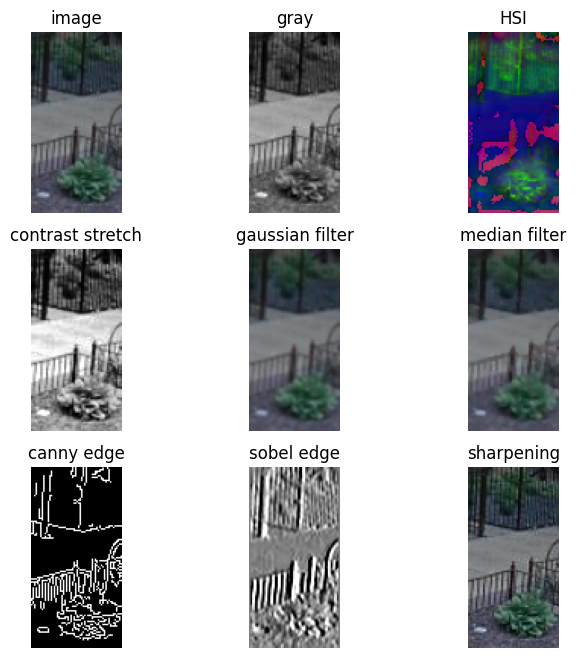

In [14]:
# visualization
plt.figure(figsize=(8, 8))

plt.subplot(3, 3, 1)
plt.title('image')
plt.axis('off')
plt.imshow(image)

plt.subplot(3, 3, 2)
plt.title('gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')

plt.subplot(3, 3, 3)
plt.title('HSI')
plt.axis('off')
plt.imshow(hsi)

plt.subplot(3, 3, 4)
plt.title('contrast stretch')
plt.axis('off')
plt.imshow(stretch, cmap='gray')

plt.subplot(3, 3, 5)
plt.title('gaussian filter')
plt.axis('off')
plt.imshow(blur_gauss)

plt.subplot(3, 3, 6)
plt.title('median filter')
plt.axis('off')
plt.imshow(blur_median)

plt.subplot(3, 3, 7)
plt.title('canny edge')
plt.axis('off')
plt.imshow(edge_canny, cmap='gray')

plt.subplot(3, 3, 8)
plt.title('sobel edge')
plt.axis('off')
plt.imshow(edge_sobelx, cmap='gray')

plt.subplot(3, 3, 9)
plt.title('sharpening')
plt.axis('off')
plt.imshow(sharp)

## Feature extraction
### histogram

<BarContainer object of 128 artists>

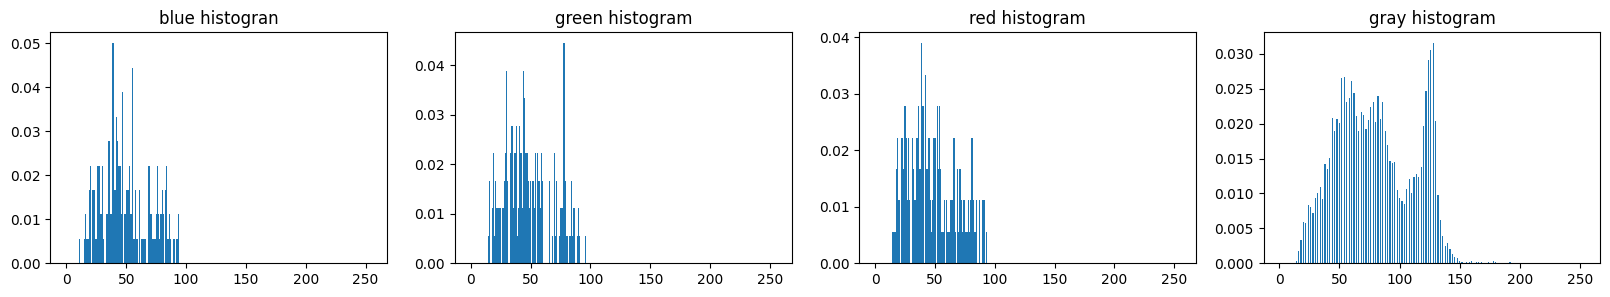

In [15]:
def norm_hist(hist):
    # Normalize the histogram
    hist = hist.astype('float')
    hist /= hist.sum()
    return hist

# color histogram
hist_b, bins_b = np.histogram(image[0], bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(image[1], bins=256, range=(0, 256))
hist_r, bins_r = np.histogram(image[2], bins=256, range=(0, 256))
hist_b = norm_hist(hist_b)    # 256-d
hist_g = norm_hist(hist_g)    # 256-d
hist_r = norm_hist(hist_r)    # 256-d

# gray histogram
hist_gray, bins_gray = np.histogram(gray, bins=128, range=(0, 256))
hist_gray = norm_hist(hist_gray)    # 128-d

# visualization
plt.figure(figsize=(20, 3))

plt.subplot(1, 4, 1)
plt.title('blue histogran')
plt.bar(bins_b[:-1], hist_b, width=1)

plt.subplot(1, 4, 2)
plt.title('green histogram')
plt.bar(bins_g[:-1], hist_g, width=1)

plt.subplot(1, 4, 3)
plt.title('red histogram')
plt.bar(bins_r[:-1], hist_r, width=1)

plt.subplot(1, 4, 4)
plt.title('gray histogram')
plt.bar(bins_gray[:-1], hist_gray, width=1)

### LBP

<BarContainer object of 64 artists>

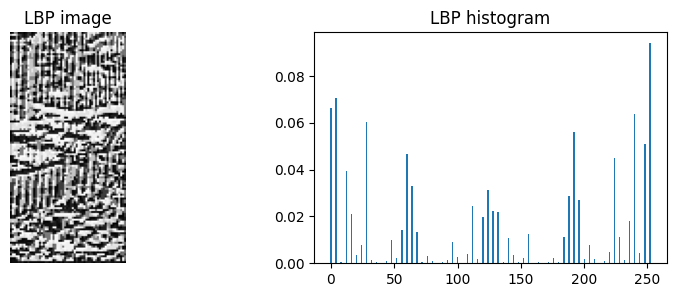

In [16]:
from skimage.feature import local_binary_pattern

# LBP
lbp = local_binary_pattern(gray, P=8, R=1)

hist_lbp, bin_lbp = np.histogram(lbp.ravel(), bins=64, range=(0, 256))
hist_lbp = norm_hist(hist_lbp)    # 64-d

# visualization
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('LBP image')
plt.axis('off')
plt.imshow(lbp, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('LBP histogram')
plt.bar(bin_lbp[:-1], hist_lbp, width=1)

### GLCM

In [17]:
# GLCM
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(gray, distances=[1], angles=[0], levels=512, symmetric=False, normed=True)

max_prob = np.max(glcm)
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')

print('Max probability:', max_prob)
print('Contrast:', contrast[0][0])
print('Dissimilarity:', dissimilarity[0][0])
print('Homogeneity:', homogeneity[0][0])
print('Energy:', energy[0][0])
print('Correlation:', correlation[0][0])

Max probability: 0.004378531073446328
Contrast: 195.0199152542373
Dissimilarity: 9.413983050847456
Homogeneity: 0.16611248742250695
Energy: 0.02416946907445544
Correlation: 0.9048280797343004


In [18]:
'''
    i j
'''
glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=False, normed=True)

'''
    i
    j
'''
glcm = graycomatrix(gray, distances=[1], angles=[np.pi/2], levels=256, symmetric=False, normed=True)

'''
    i
      j
'''
glcm = graycomatrix(gray, distances=[1], angles=[np.pi/4], levels=256, symmetric=False, normed=True)

### Law's texture

In [19]:
# Law's texture
from scipy import signal as sg

def laws_texture(gray):
    (rows, cols) = gray.shape[:2]
    
    smooth_kernel = (1/25)*np.ones((5,5))
    gray_smooth = sg.convolve(gray, smooth_kernel,"same")
    gray_processed = np.abs(gray - gray_smooth)
    
    filter_vectors = np.array([[ 1,  4,  6,  4, 1],    # L5
                               [-1, -2,  0,  2, 1],    # E5
                               [-1,  0,  2,  0, 1],    # S5
                               [ 1, -4,  6, -4, 1]])   # R5

    # 0:L5L5, 1:L5E5, 2:L5S5, 3:L5R5, 
    # 4:E5L5, 5:E5E5, 6:E5S5, 7:E5R5,
    # 8:S5L5, 9:S5E5, 10:S5S5, 11:S5R5, 
    # 12:R5L5, 13:R5E5, 14:R5S5, 15:R5R5
    filters = list()
    for i in range(4):
        for j in range(4):
            filters.append(np.matmul(filter_vectors[i][:].reshape(5,1),
                                     filter_vectors[j][:].reshape(1,5)))

    conv_maps = np.zeros((rows, cols,16))
    for i in range(len(filters)):
        conv_maps[:, :, i] = sg.convolve(gray_processed,
                                         filters[i],'same')

    texture_maps = list()
    texture_maps.append((conv_maps[:, :, 1]+conv_maps[:, :, 4])//2)     # L5E5 / E5L5
    texture_maps.append((conv_maps[:, :, 2]+conv_maps[:, :, 8])//2)     # L5S5 / S5L5
    texture_maps.append((conv_maps[:, :, 3]+conv_maps[:, :, 12])//2)    # L5R5 / R5L5
    texture_maps.append((conv_maps[:, :, 7]+conv_maps[:, :, 13])//2)    # E5R5 / R5E5
    texture_maps.append((conv_maps[:, :, 6]+conv_maps[:, :, 9])//2)     # E5S5 / S5E5
    texture_maps.append((conv_maps[:, :, 11]+conv_maps[:, :, 14])//2)   # S5R5 / R5S5
    texture_maps.append(conv_maps[:, :, 10])                            # S5S5
    texture_maps.append(conv_maps[:, :, 5])                             # E5E5
    texture_maps.append(conv_maps[:, :, 15])                            # R5R5
    texture_maps.append(conv_maps[:, :, 0])                             # L5L5 (use to norm TEM)

    TEM = list()
    for i in range(9):
        TEM.append(np.abs(texture_maps[i]).sum() / np.abs(texture_maps[9]).sum())
        
    return TEM

laws = laws_texture(gray)    # 9-d
print(laws)

[0.06443775677205259, 0.12854751571854708, 0.1371062899858967, 0.029478328873151213, 0.013048268634329173, 0.026008953521056827, 0.019308461496300514, 0.020499066577864548, 0.053267667554614394]


### SIFT

8


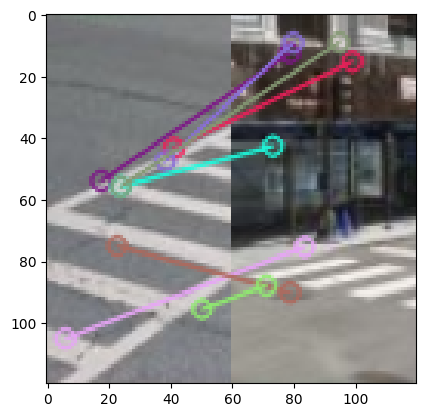

In [20]:
image1 = cv2.imread('./recaptcha-dataset/Large/Crosswalk/Cross (2).png')
image2 = cv2.imread('./recaptcha-dataset/Large/Crosswalk/Cross (5).png')

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(image1, None)    # des: (n, 128)
kp2, des2 = sift.detectAndCompute(image2, None)    # des: (n, 128)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)
print(len(matches))
matches = sorted(matches, key = lambda x:x.distance)
image3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:],None,flags=2)
plt.imshow(image3)
plt.show()

### HoG

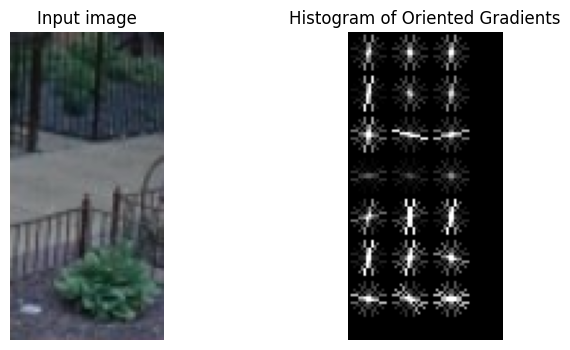

In [21]:
from skimage.feature import hog
from skimage import data, exposure

# Extract HoG features
# fd: 8 * (image.shape[0]//16)*(image.shape[1]//16) dimension
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

# Visualize HoG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap='gray')
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### KNN

In [22]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

# recaptcha = './recaptcha-dataset/Large'
# labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 
#           'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']

# train_features = []
# train_labels = []
# test_features = []
# test_labels = []

# for label in labels:
#     image_dir = os.path.join(recaptcha, label)
#     image_list = os.listdir(image_dir)
#     for i, image_name in enumerate(image_list):
#         image_path = os.path.join(image_dir, image_name)
#         img = cv2.imread(image_path)
#         gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         if i < 100:
#             train_features.append(laws_texture(gray_img))
#             train_labels.append(label)
#         elif 100 <= i < 200:
#             test_features.append(laws_texture(gray_img))
#             test_labels.append(label)
#         else:
#             break
            
# classifier = KNeighborsClassifier(n_neighbors = 5)

# classifier.fit(train_features, train_labels)
# predict_labels = classifier.predict(test_features)
# print(classification_report(test_labels, predict_labels))

In [23]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

# recaptcha = './recaptcha-dataset/Large'
# labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 
#           'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']

# train_features = []
# train_labels = []
# test_features = []
# test_labels = []

# for label in labels:
#     image_dir = os.path.join(recaptcha, label)
#     image_list = os.listdir(image_dir)
#     for i, image_name in enumerate(image_list):
#         image_path = os.path.join(image_dir, image_name)
#         img = cv2.imread(image_path)
#         img = cv2.resize(img,(64,64))
#         #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)

        
#         if i < 100:
#             train_features.append(fd)
#             train_labels.append(label)
#         elif 100 <= i < 150:
#             test_features.append(fd)
#             test_labels.append(label)
#         else:
#             break
            
# classifier = KNeighborsClassifier(n_neighbors = 5)

# classifier.fit(train_features, train_labels)
# predict_labels = classifier.predict(test_features)
# print(classification_report(test_labels, predict_labels))

In [24]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

recaptcha = './recaptcha-dataset/Large'
labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']

# Define the transform to be applied to the input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_features = [] # Features for training
train_labels = [] # Labels for training
test_features = [] # Features for testing
test_labels = [] # Labels for testing

# Load the ResNet model
model = models.resnet18(pretrained=True)
model.eval()

for label in labels:
    image_dir = os.path.join(recaptcha, label)
    image_list = os.listdir(image_dir)
    for i, image_name in enumerate(image_list):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (64, 64))
        
        # Preprocess the image using the same transform as in the deep learning model
        pil_image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        preprocessed_image = transform(pil_image).unsqueeze(0)
        
        # Extract features using the ResNet model
        with torch.no_grad():
            features = model(preprocessed_image)
        
        features = features.squeeze().cpu().numpy()
        
        if i < 300: # Use the first 300 images for training
            train_features.append(features)
            train_labels.append(label)
        elif 300 <= i < 350: # Use the next 50 images for testing
            test_features.append(features)
            test_labels.append(label)
        else:
            break

# Convert features to numpy arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Flatten the feature arrays
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Train the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='distance')
classifier.fit(train_features, train_labels)

# Perform classification on test features
predicted_labels = classifier.predict(test_features)

# Print classification report
print(classification_report(test_labels, predicted_labels))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


               precision    recall  f1-score   support

      Bicycle       0.58      0.44      0.50        50
       Bridge       0.58      0.78      0.67        50
          Bus       0.79      0.46      0.58        50
          Car       0.80      0.72      0.76        50
      Chimney       0.00      0.00      0.00         0
    Crosswalk       0.50      0.84      0.63        50
      Hydrant       1.00      0.80      0.89        50
   Motorcycle       0.83      0.78      0.80        50
         Palm       0.75      0.78      0.76        50
Traffic Light       0.81      0.70      0.75        50

     accuracy                           0.70       450
    macro avg       0.66      0.63      0.63       450
 weighted avg       0.74      0.70      0.70       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#knn알고리즘으로 특징 분류 
recaptcha = './recaptcha-dataset/Large'
labels = ['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 
          'Crosswalk', 'Hydrant', 'Motorcycle', 'Palm', 'Traffic Light']


train_features = [] #학습에 사용할 특징
train_labels = [] #학습으로 분류된 이미지의 라벨
test_features = []
test_labels = []

for label in labels:
    image_dir = os.path.join(recaptcha, label)
    image_list = os.listdir(image_dir)
    for i, image_name in enumerate(image_list):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (64, 64))
        
        #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #gray_img = cv2.resize(gray_img, (64, 64))
        # laws_features = my_laws_texture(gray_img)
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8,8),
                    cells_per_block=(3, 3), visualize=True, channel_axis=-1)

        
        if  i < 300: #앞에 있는 10장의 이미지를 학습 feature로 사용
            train_features.append(fd)
            train_labels.append(label)
        elif 300 <= i < 350: #뒤에 있는 10장의 이미지를 테스트에 사용
            test_features.append(fd)
            test_labels.append(label)
        else:
            break
            
classifier = KNeighborsClassifier(algorithm='auto',n_neighbors = 9, metric='euclidean', weights='distance') #이웃의 숫자는 실험을 통해서 정하도록 하자

classifier.fit(train_features, train_labels) #학습
predict_labels = classifier.predict(test_features) #test feature로 예측한 결과가 predict_label에 저장됨
print(classification_report(test_labels, predict_labels))

               precision    recall  f1-score   support

      Bicycle       0.50      0.12      0.19        50
       Bridge       0.28      0.60      0.38        50
          Bus       0.43      0.48      0.45        50
          Car       0.57      0.54      0.56        50
      Chimney       0.00      0.00      0.00         0
    Crosswalk       0.35      0.46      0.40        50
      Hydrant       0.67      0.62      0.65        50
   Motorcycle       0.82      0.28      0.42        50
         Palm       0.43      0.56      0.49        50
Traffic Light       0.47      0.28      0.35        50

     accuracy                           0.44       450
    macro avg       0.45      0.39      0.39       450
 weighted avg       0.50      0.44      0.43       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 1: Classification

In [26]:
predict_labels = classifier.predict(test_features)
print(predict_labels)    # array(100)

['Bus' 'Bicycle' 'Bus' 'Bicycle' 'Crosswalk' 'Bridge' 'Palm' 'Bridge'
 'Traffic Light' 'Bus' 'Crosswalk' 'Bridge' 'Bus' 'Palm' 'Bridge' 'Bus'
 'Crosswalk' 'Bridge' 'Bicycle' 'Bridge' 'Car' 'Bridge' 'Crosswalk' 'Bus'
 'Bridge' 'Bridge' 'Traffic Light' 'Bus' 'Crosswalk' 'Crosswalk' 'Bicycle'
 'Bridge' 'Bus' 'Bridge' 'Crosswalk' 'Bridge' 'Bridge' 'Bridge' 'Hydrant'
 'Bus' 'Bicycle' 'Crosswalk' 'Bridge' 'Bridge' 'Bridge' 'Crosswalk'
 'Bridge' 'Bicycle' 'Crosswalk' 'Bridge' 'Bridge' 'Bridge' 'Bridge' 'Palm'
 'Crosswalk' 'Bridge' 'Crosswalk' 'Crosswalk' 'Bridge' 'Crosswalk'
 'Bridge' 'Crosswalk' 'Bridge' 'Bridge' 'Bus' 'Bridge' 'Bus' 'Bridge'
 'Crosswalk' 'Bridge' 'Bridge' 'Traffic Light' 'Bridge' 'Bridge' 'Bridge'
 'Bus' 'Bridge' 'Bridge' 'Bridge' 'Crosswalk' 'Bridge' 'Bridge' 'Bridge'
 'Bus' 'Bridge' 'Crosswalk' 'Bridge' 'Bridge' 'Bridge' 'Crosswalk' 'Bus'
 'Bridge' 'Bridge' 'Bridge' 'Bridge' 'Crosswalk' 'Bridge' 'Bicycle' 'Bus'
 'Car' 'Bus' 'Bus' 'Bus' 'Bridge' 'Bridge' 'Bus' 'Bridge' 'Bu

In [27]:
import csv

with open('c1_t1_a1.csv','w') as file :
    write = csv.writer(file)
    for i, predict_label in enumerate(predict_labels):
        write.writerow([f'query{i+1}.png', predict_label])

### Task 2: Retrieval

In [28]:
neigh_ind = classifier.kneighbors(X=test_features, n_neighbors=10, return_distance=False) # Top-10 results
neigh_labels = np.array(train_labels)[neigh_ind]    

In [29]:
print(neigh_labels)    # array(100x10)

[['Bus' 'Bicycle' 'Bus' ... 'Bridge' 'Bicycle' 'Bridge']
 ['Bicycle' 'Bus' 'Bridge' ... 'Bus' 'Bridge' 'Bridge']
 ['Bus' 'Bus' 'Crosswalk' ... 'Crosswalk' 'Chimney' 'Bus']
 ...
 ['Bus' 'Bus' 'Bus' ... 'Car' 'Bus' 'Hydrant']
 ['Traffic Light' 'Traffic Light' 'Traffic Light' ... 'Traffic Light'
  'Palm' 'Traffic Light']
 ['Traffic Light' 'Motorcycle' 'Palm' ... 'Hydrant' 'Traffic Light' 'Car']]


In [30]:
import csv

with open('c1_t2_a1.csv','w') as file :
    write = csv.writer(file)
    for i, neigh_label in enumerate(neigh_labels):
        write.writerow([f'query{i+1}.png'] + list(neigh_label))